In [127]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import requests
import json
import pandas
import os.path as path
import os 
import numpy as np
import calendar

def pad_day(day):
    if day < 10:
        day = "0" + str(day)
    return str(day)
apikey = 'ZUB2XVF70GNQ804B'


In [ ]:


for x in range(1,6):
    day = pad_day(x)
    url = 'https://cloud.iexapis.com/stable/stock/AAPL/intraday-prices?token=' + token + '&exactDate=202102' + day
    print(url)
    headers = {'Content-Type': 'application/json'}
    response = requests.request('GET', url)

    with open('datasets/AAPL/AAPL_daily' + str(x) + '.json', 'w') as outfile:
        json.dump(response.json(), outfile)

    with open('datasets/AAPL/AAPL_daily' + str(x) + '.json', 'r') as json_file:
        data = pandas.read_json(json_file)
    print(data)

In [125]:
def stockMonthlyData(symbol):
    urlfirst = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=' + symbol + '&apikey=' + apikey
    print(urlfirst)
    headers = {'Content-Type': 'application/json'}
    response = requests.request('GET', urlfirst)
    os.mkdir('datasets/'+symbol)
    with open('datasets/'+symbol+'/monthly.json', 'w') as outfile:
        json.dump(response.json()["Monthly Time Series"], outfile)
    with open('datasets/'+symbol+'/monthly.json', 'r') as json_file:
        monthlydata = pandas.read_json(json_file)
        
    return monthlydata

In [116]:
def stockReturn(symbol, year):
    if(not path.exists("datasets/" + symbol + "/monthly.json")):
        monthlydata = stockMonthlyData(symbol)
    else:
        with open('datasets/'+symbol+'/monthly.json', 'r') as json_file:
            monthlydata = pandas.read_json(json_file)
            
    keys = pandas.Index(monthlydata.keys().to_period("M"))
    
    initialdate = str(year-1)+"-12"
    initialdate = keys.get_loc(initialdate)
    openValue = monthlydata[monthlydata.keys()[initialdate]]["4. close"]
    
    finaldate = str(year)+"-12"
    finaldate = keys.get_loc(finaldate)
    closeValue = monthlydata[monthlydata.keys()[finaldate]]["4. close"]
    
    
    return (closeValue - openValue) / openValue

In [46]:
wfdata = stockMonthlyData("WFC")

https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol=WFC&apikey=ZUB2XVF70GNQ804B


In [47]:
wfdata

,2021-04-01,2021-03-31,2021-02-26,2021-01-29,2020-12-31,2020-11-30,2020-10-30,2020-09-30,2020-08-31,2020-07-31,...,2000-09-29,2000-08-31,2000-07-31,2000-06-30,2000-05-31,2000-04-28,2000-03-31,2000-02-29,2000-01-31,1999-12-31
1. open,38.96,3.711000e+01,3.014000e+01,3.032000e+01,2.815000e+01,2.170000e+01,2.357000e+01,2.402000e+01,2.425000e+01,2.573000e+01,...,44.00,41.75,40.25,45.25,41.13,4.094000e+01,3.306000e+01,40.00,4.031000e+01,46.38
2. high,39.65,4.154000e+01,3.868000e+01,3.510000e+01,3.049000e+01,2.873000e+01,2.574000e+01,2.600000e+01,2.614000e+01,2.685000e+01,...,47.13,45.81,44.06,47.75,45.63,4.550000e+01,4.262000e+01,40.69,4.375000e+01,48.63
3. low,38.92,3.634000e+01,2.968000e+01,2.940020e+01,2.784500e+01,2.117000e+01,2.076000e+01,2.255500e+01,2.352000e+01,2.333000e+01,...,42.69,40.94,39.88,37.31,39.25,3.788000e+01,3.100000e+01,32.00,3.544000e+01,38.50
4. close,39.63,3.907000e+01,3.617000e+01,2.988000e+01,3.018000e+01,2.735000e+01,2.145000e+01,2.351000e+01,2.415000e+01,2.426000e+01,...,45.94,43.21,41.50,38.75,45.25,4.106000e+01,4.075000e+01,33.06,4.000000e+01,40.44
5. volume,22706933.00,7.815674e+08,6.536382e+08,7.978371e+08,7.361271e+08,8.676820e+08,8.206210e+08,9.976711e+08,7.362361e+08,1.031616e+09,...,70172400.00,69630200.00,57451000.00,89251700.00,76132200.00,1.006484e+08,1.272604e+08,98403500.00,1.072874e+08,84749100.00


In [145]:
def plotReturn(symbol, start, end):
    df = pandas.DataFrame([stockReturn(symbol, i)*100 for i in range(start, end+1)])
    p = df.plot()

In [146]:
wfreturn = stockReturn("AAL", 2013)
print(wfreturn)

0.8703703703703703


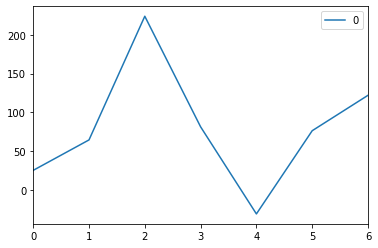

In [154]:
plotReturn("NVDA", 2014, 2020)

In [113]:
initialdate = str(2012)+"-12"
keys = pandas.Index(monthlydata.keys().to_period("M"))
initialdate = keys.get_loc(initialdate)
print(monthlydata[monthlydata.keys()[initialdate]])

1. open      3.318000e+01
2. high      3.519000e+01
3. low       3.241000e+01
4. close     3.418000e+01
5. volume    4.658660e+08
Name: 2012-12-31 00:00:00, dtype: float64
